<a href="https://colab.research.google.com/github/lavanblavan/SentimentAnalysis-Using-Pyspark/blob/main/SA_With_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [ ]:
!pip install nltk
!pip install spacy
!pip install pyspark py4j
!pip install pyspark transformers torch
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/drive/MyDrive/DrugReview
# download dataset from kaggle
!kaggle datasets download mohamedabdelwahabali/drugreview
!unzip /content/drugreview.zip -d /content/drive/MyDrive/DrugReview
!chmod 600 /content/drive/MyDrive/DrugReview/kaggle.json

Dataset URL: https://www.kaggle.com/datasets/mohamedabdelwahabali/drugreview
License(s): CC0-1.0
 98% 194M/199M [00:06<00:00, 39.5MB/s]
100% 199M/199M [00:06<00:00, 33.1MB/s]
Archive:  /content/drugreview.zip
  inflating: /content/drive/MyDrive/DrugReview/drug_review/dataset_dict.json  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/test/dataset.arrow  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/test/dataset_info.json  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/test/state.json  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/train/dataset.arrow  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/train/dataset_info.json  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/train/state.json  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/validation/dataset.arrow  
  inflating: /content/drive/MyDrive/DrugReview/drug_review/validation/dataset_info.json  
  inflating: /content/drive/MyDrive/DrugReview/drug

### **Analysis**

In [4]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.appName("DrugReviewAnalysis").getOrCreate()
df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_train.csv", header=True, inferSchema=True,multiLine=True,escape='"')
df.show()

+---+----------+--------------------+--------------------+--------------------+------+-----------------+-----------+-------------+
|_c0|patient_id|            drugName|           condition|              review|rating|             date|usefulCount|review_length|
+---+----------+--------------------+--------------------+--------------------+------+-----------------+-----------+-------------+
|  0|     89879|        Cyclosporine|keratoconjunctivi...|"i have used rest...|   2.0|   April 20, 2013|         69|          147|
|  1|    143975|        Etonogestrel|       birth control|"my experience ha...|   7.0|   August 7, 2016|          4|          136|
|  2|    106473|            Implanon|       birth control|"this is my secon...|   1.0|     May 11, 2016|          6|          140|
|  3|    184526|         Hydroxyzine|             anxiety|"i recommend taki...|  10.0|   March 19, 2012|        124|          104|
|  4|     91587|       Dalfampridine|  multiple sclerosis|"i have been on a...|   9

In [16]:
df.count()

110811

In [30]:
drug = df.groupBy('drugName').count().sort('count',ascending=False)
drug.show()
print(drug.count())

+--------------------+-----+
|            drugName|count|
+--------------------+-----+
|      Levonorgestrel| 2833|
|        Etonogestrel| 2577|
|Ethinyl estradiol...| 2121|
|           Nexplanon| 1672|
|Ethinyl estradiol...| 1549|
|Ethinyl estradiol...| 1370|
|         Phentermine| 1132|
|          Sertraline|  981|
|              Mirena|  959|
|        Escitalopram|  921|
|            Implanon|  859|
|           Bupropion|  742|
|          Miconazole|  734|
| Medroxyprogesterone|  731|
|          Citalopram|  723|
|          Gabapentin|  713|
|         Venlafaxine|  706|
|Bupropion / naltr...|  687|
|            Contrave|  679|
|             Lexapro|  679|
+--------------------+-----+
only showing top 20 rows

2865


In [29]:
condition = df.groupBy('condition').count().sort('count',ascending=False)
condition.show()
print(condition.count())

+--------------------+-----+
|           condition|count|
+--------------------+-----+
|       birth control|22123|
|          depression| 6444|
|                acne| 4145|
|             anxiety| 3964|
|                pain| 3773|
|     bipolar disorde| 2880|
|         weight loss| 2637|
|             obesity| 2610|
|            insomnia| 2417|
|                adhd| 2375|
|emergency contrac...| 1898|
|    diabetes, type 2| 1727|
|vaginal yeast inf...| 1662|
|abnormal uterine ...| 1574|
| high blood pressure| 1426|
|   bowel preparation| 1385|
|   smoking cessation| 1280|
|  anxiety and stress| 1191|
|         ibromyalgia| 1181|
|major depressive ...| 1158|
+--------------------+-----+
only showing top 20 rows

791


In [14]:
from pyspark.sql.functions import col, when, isnull, isnan, count, lower
df.select([count(when(
    isnan(col(each_col)) | \
    (col(each_col) == "") | \
    isnull(col(each_col)) | \
    (lower(col(each_col)) == "null"), 1 \
)).alias(f"{each_col} -> count") for each_col in df.columns]).show()

+------------+-------------------+-----------------+------------------+---------------+---------------+-------------+--------------------+----------------------+
|_c0 -> count|patient_id -> count|drugName -> count|condition -> count|review -> count|rating -> count|date -> count|usefulCount -> count|review_length -> count|
+------------+-------------------+-----------------+------------------+---------------+---------------+-------------+--------------------+----------------------+
|           0|                  0|                0|                 0|              0|              0|            0|                   0|                     0|
+------------+-------------------+-----------------+------------------+---------------+---------------+-------------+--------------------+----------------------+



<ipython-input-39-8a5da9b0032a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='count', data=rating_counts_pandas, palette='viridis')


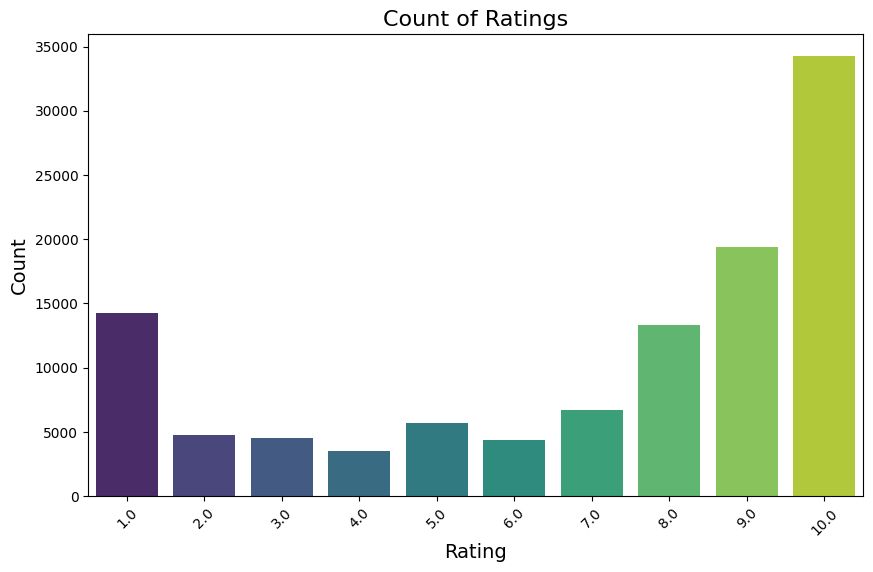

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Select the 'rating' column
rating_df = df.select('rating')

# Aggregate the count of each rating
rating_counts = rating_df.groupBy('rating').count().orderBy('rating')

# Convert PySpark DataFrame to Pandas DataFrame for visualization
rating_counts_pandas = rating_counts.toPandas()

# Plot 1: Bar Plot (Count of Ratings)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='count', data=rating_counts_pandas, palette='viridis')
plt.title('Count of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




<ipython-input-13-c947aa5464a4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="avg_review_length", data=rating_review_avg_pandas, palette="viridis")


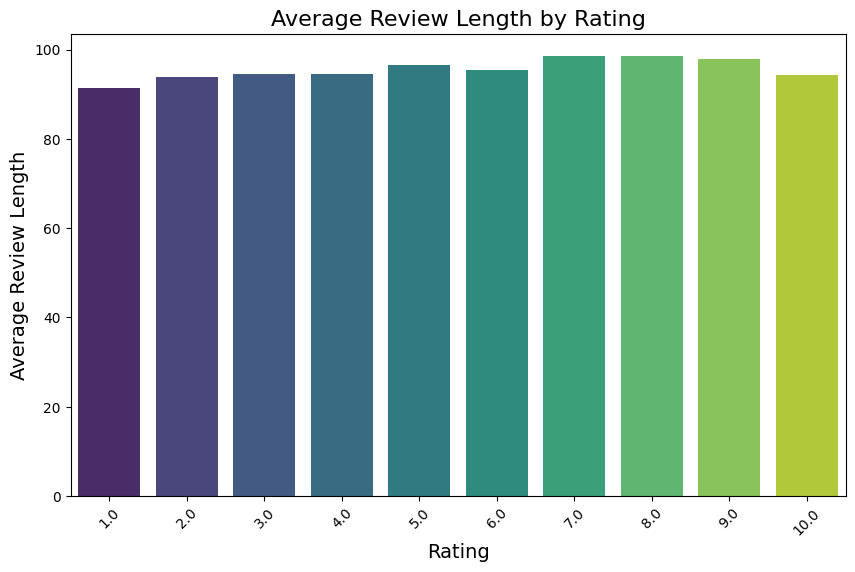

<ipython-input-13-c947aa5464a4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="avg_usefulCount", data=rating_useful_avg_pandas , palette="viridis") # Changed 'avg_useful_count' to 'avg_usefulCount'


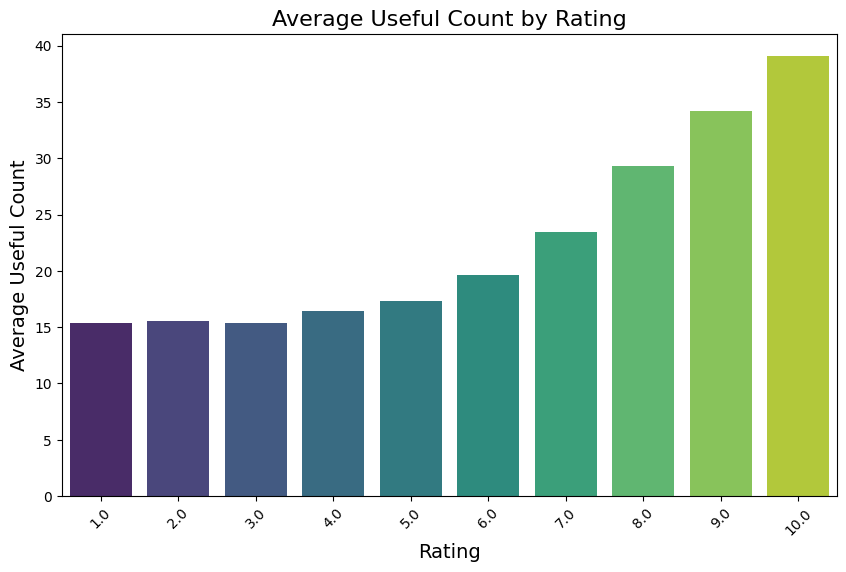

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

# Group by 'rating' and calculate the average review length
rating_review_avg = df.groupBy("rating").agg(avg("review_length").alias("avg_review_length")).orderBy("rating")
rating_useful_avg = df.groupBy("rating").agg(avg("usefulCount").alias("avg_usefulCount")).orderBy("rating")

# Convert to Pandas for visualization
rating_review_avg_pandas = rating_review_avg.toPandas()
rating_useful_avg_pandas = rating_useful_avg.toPandas()

# Plot: Average Review Length per Rating
plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="avg_review_length", data=rating_review_avg_pandas, palette="viridis")
plt.title("Average Review Length by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Average Review Length", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="avg_usefulCount", data=rating_useful_avg_pandas , palette="viridis") # Changed 'avg_useful_count' to 'avg_usefulCount'
plt.title("Average Useful Count by Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Average Useful Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# **Sentimental Analysis Training**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover, HashingTF, IDF, RegexTokenizer, StringIndexer
from pyspark.ml import Pipeline, Transformer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType, StringType, ArrayType, DoubleType
from pyspark.sql.functions import regexp_replace
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
from pyspark.ml.util import DefaultParamsWritable, DefaultParamsReadable
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from tensorflow import keras
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Download NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_train.csv",
                    header=True, inferSchema=True, multiLine=True, escape='"')

# Select relevant columns
df = df.select('rating', 'review')

# Remove special characters
df = df.withColumn('review', regexp_replace('review', '[^a-zA-Z0-9\\s]', ''))

# Tokenization
tokenizer = RegexTokenizer(inputCol="review", outputCol="tokenized_words", pattern="\\W")

# Define sentiment labels based on rating
def sentiment_label(rating):
    if rating > 8:
        return 2  # Positive
    elif rating < 4:
        return 0  # Negative
    else:
        return 1  # Neutral

sentiment_udf = udf(sentiment_label, IntegerType())
df = df.withColumn("label", sentiment_udf(col("rating")))

# Stop words removal
stopwords_remover = StopWordsRemover(inputCol="tokenized_words", outputCol="filtered_words")

# Lemmatization
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in text]

lemmatize_udf = udf(lemmatizer, ArrayType(StringType()))

class LemmatizerTransformer(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol="filtered_words", outputCol="lemmatized_words"):
        super(LemmatizerTransformer, self).__init__()
        self._setDefault(inputCol=inputCol, outputCol=outputCol)  # Set default using _setDefault
        self.inputCol = inputCol
        self.outputCol = outputCol

    def _transform(self, dataset):
        return dataset.withColumn(self.outputCol, lemmatize_udf(col(self.inputCol)))

lemmatizer_transformer = LemmatizerTransformer(inputCol="filtered_words", outputCol="lemmatized_words")

# Feature extraction (TF-IDF)
hashingTF = HashingTF(inputCol="lemmatized_words", outputCol="raw_tf_features", numFeatures=2000)
idf = IDF(inputCol="raw_tf_features", outputCol="tfidf_features")

# Convert label column to numerical index
indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

# Split data into training and validation sets
train_df, val_df = df.randomSplit([0.8, 0.2], seed=42)

# Define the pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, lemmatizer_transformer, hashingTF, idf, indexer])

# Train the pipeline
pipeline_model = pipeline.fit(train_df)

# Transform the training and validation sets
train_df = pipeline_model.transform(train_df)
val_df = pipeline_model.transform(val_df)

# Convert Spark DataFrame to Pandas for Neural Network Training
train_pandas = train_df.select("tfidf_features", "indexedLabel").toPandas()
X_train = np.array([x.toArray() for x in train_pandas["tfidf_features"]])
y_train = train_pandas["indexedLabel"].values

# Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(2000,)),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32,activation = "relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation="softmax")  # 3 sentiment classes

])

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Save Model
model.save("/content/sentiment_model.h5")

# Load the trained model
model = keras.models.load_model("/content/sentiment_model.h5")

# Define UDF for Prediction
def predict_sentiment(features):
    features = np.array(features.toArray()).astype(np.float32).reshape(1, -1)
    prediction = model.predict(features, verbose=0)
    return float(np.argmax(prediction))

predict_udf = udf(predict_sentiment, DoubleType())
val_df = val_df.limit(100)
# Apply Prediction to Validation Set
predictions = val_df.withColumn("prediction", predict_udf(col("tfidf_features")))

# Evaluate Accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(predictions)
print(f"Validation Accuracy: {accuracy:.4f}")









[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5924 - loss: 0.8740
Epoch 2/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7254 - loss: 0.6388
Epoch 3/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8333 - loss: 0.4183
Epoch 4/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9098 - loss: 0.2486
Epoch 5/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9468 - loss: 0.1513
Epoch 6/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9638 - loss: 0.1051
Epoch 7/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9733 - loss: 0.0791
Epoch 8/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9793 - loss: 0.0629
Epoch 9/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9804 - loss: 0.0595
Epoch 10/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9845 - loss: 0.0456


Validation Accuracy: 0.7200


In [3]:
import tensorflow as tf
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer, StringIndexer, Word2Vec
from pyspark.ml import Pipeline, Transformer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType, StringType, ArrayType, DoubleType
from pyspark.sql.functions import regexp_replace
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
from pyspark.ml.util import DefaultParamsWritable, DefaultParamsReadable
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from tensorflow import keras
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Download NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_train.csv",
                    header=True, inferSchema=True, multiLine=True, escape='"')

# Select relevant columns
df = df.select('rating', 'review')

# Remove special characters
df = df.withColumn('review', regexp_replace('review', '[^a-zA-Z0-9\s]', ''))

# Tokenization
tokenizer = RegexTokenizer(inputCol="review", outputCol="tokenized_words", pattern="\\W")

# Define sentiment labels based on rating
def sentiment_label(rating):
    if rating > 8:
        return 2  # Positive
    elif rating < 4:
        return 0  # Negative
    else:
        return 1  # Neutral

sentiment_udf = udf(sentiment_label, IntegerType())
df = df.withColumn("label", sentiment_udf(col("rating")))

# Stop words removal
stopwords_remover = StopWordsRemover(inputCol="tokenized_words", outputCol="filtered_words")

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatizer_func(text):
    return [lemmatizer.lemmatize(token) for token in text]

lemmatize_udf = udf(lemmatizer_func, ArrayType(StringType()))

class LemmatizerTransformer(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol="filtered_words", outputCol="lemmatized_words"):
        super(LemmatizerTransformer, self).__init__()
        self._setDefault(inputCol=inputCol, outputCol=outputCol)
        self.inputCol = inputCol
        self.outputCol = outputCol

    def _transform(self, dataset):
        return dataset.withColumn(self.outputCol, lemmatize_udf(col(self.inputCol)))

lemmatizer_transformer = LemmatizerTransformer(inputCol="filtered_words", outputCol="lemmatized_words")

# Feature extraction using Word2Vec
word2vec = Word2Vec(vectorSize=200, minCount=1, inputCol="lemmatized_words", outputCol="word2vec_features")

# Convert label column to numerical index
indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

# Split data into training and validation sets
train_df, val_df = df.randomSplit([0.8, 0.2], seed=42)

# Define the pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, lemmatizer_transformer, word2vec, indexer])

# Train the pipeline
pipeline_model = pipeline.fit(train_df)

# Transform the training and validation sets
train_df = pipeline_model.transform(train_df)
val_df = pipeline_model.transform(val_df)

# Convert Spark DataFrame to Pandas for Neural Network Training
train_pandas = train_df.select("word2vec_features", "indexedLabel").toPandas()
X_train = np.array([x for x in train_pandas["word2vec_features"]])
y_train = train_pandas["indexedLabel"].values

# Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(200,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(3, activation="softmax")  # 3 sentiment classes
])

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Save Model
model.save("/content/sentiment_model.h5")

# Load the trained model
model = keras.models.load_model("/content/sentiment_model.h5")

# Define UDF for Prediction
def predict_sentiment(features):
    features = np.array(features).astype(np.float32).reshape(1, -1)
    prediction = model.predict(features, verbose=0)
    return float(np.argmax(prediction))

predict_udf = udf(predict_sentiment, DoubleType())
val_df = val_df.limit(100)

# Apply Prediction to Validation Set
predictions = val_df.withColumn("prediction", predict_udf(col("word2vec_features")))

# Evaluate Accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5797 - loss: 0.8864
Epoch 2/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6337 - loss: 0.7991
Epoch 3/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6432 - loss: 0.7776
Epoch 4/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6534 - loss: 0.7587
Epoch 5/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6624 - loss: 0.7430
Epoch 6/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6694 - loss: 0.7282
Epoch 7/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6769 - loss: 0.7170
Epoch 8/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6819 - loss: 0.7056
Epoch 9/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6884 - loss: 0.6920
Epoch 10/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6969 - loss: 0.6777


Validation Accuracy: 0.7100


In [4]:
test_df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_test.csv",
                          header=True, inferSchema=True, multiLine=True, escape='"')
# Select relevant columns
test_df = test_df.select('rating', 'review')

# Remove special characters
test_df=test_df.withColumn('review', regexp_replace('review', '[^a-zA-Z0-9\s]', ''))
# Define sentiment labels based on rating
def sentiment_label(rating):
    if rating > 8:
        return 2  # Positive
    elif rating < 4:
        return 0  # Negative
    else:
        return 1  # Neutral

sentiment_udf = udf(sentiment_label, IntegerType())
test_df = test_df.withColumn("label", sentiment_udf(col("rating")))
test_df = pipeline_model.transform(test_df)
test_pandas = test_df.select("word2vec_features", "indexedLabel").toPandas()
X_train = np.array([x for x in test_pandas["word2vec_features"]])
y_train = test_pandas["indexedLabel"].values
predictions = model.predict(X_train, verbose=0)
predictions = np.argmax(predictions, axis=1)
accuracy = np.mean(predictions == y_train)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.6454


In [6]:
# Import necessary libraries
import tensorflow as tf

# Disable GPU
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover, HashingTF, IDF, RegexTokenizer, StringIndexer
from pyspark.ml import Pipeline, PipelineModel
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType, StringType, ArrayType, DoubleType
from pyspark.sql.functions import regexp_replace
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
from pyspark.ml.util import DefaultParamsWritable, DefaultParamsReadable
from pyspark.ml.param.shared import HasInputCol, HasOutputCol

from tensorflow import keras
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Download NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize Spark session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_train.csv",
                    header=True, inferSchema=True, multiLine=True, escape='"')

# Select relevant columns
df = df.select('rating', 'review')

# Remove special characters
df = df.withColumn('review', regexp_replace('review', '[^a-zA-Z0-9\\s]', ''))

# Tokenization
tokenizer = RegexTokenizer(inputCol="review", outputCol="tokenized_words", pattern="\\W")

# Define sentiment labels based on rating
def sentiment_label(rating):
    if rating > 8:
        return 2  # Positive
    elif rating < 4:
        return 0  # Negative
    else:
        return 1  # Neutral

sentiment_udf = udf(sentiment_label, IntegerType())
df = df.withColumn("label", sentiment_udf(col("rating")))

# Stop words removal
stopwords_remover = StopWordsRemover(inputCol="tokenized_words", outputCol="filtered_words")

# Lemmatization
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in text]

lemmatize_udf = udf(lemmatizer, ArrayType(StringType()))

class LemmatizerTransformer(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol="filtered_words", outputCol="lemmatized_words"):
        super(LemmatizerTransformer, self).__init__()
        self._setDefault(inputCol=inputCol, outputCol=outputCol)  # Set default using _setDefault
        self.inputCol = inputCol
        self.outputCol = outputCol

    def _transform(self, dataset):
        return dataset.withColumn(self.outputCol, lemmatize_udf(col(self.inputCol)))

lemmatizer_transformer = LemmatizerTransformer(inputCol="filtered_words", outputCol="lemmatized_words")

# Feature extraction (TF-IDF)
hashingTF = HashingTF(inputCol="lemmatized_words", outputCol="raw_tf_features", numFeatures=2000)
idf = IDF(inputCol="raw_tf_features", outputCol="tfidf_features")

# Convert label column to numerical index
indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

# Split data into training and validation sets
train_df, val_df = df.randomSplit([0.8, 0.2], seed=42)

# Define the pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, lemmatizer_transformer, hashingTF, idf, indexer])

# Train the pipeline
pipeline_model = pipeline.fit(train_df)

# Transform the training and validation sets
train_df = pipeline_model.transform(train_df)
val_df = pipeline_model.transform(val_df)

# Convert Spark DataFrame to Pandas for Neural Network Training
train_pandas = train_df.select("tfidf_features", "indexedLabel").toPandas()
X_train = np.array([x.toArray() for x in train_pandas["tfidf_features"]])
y_train = train_pandas["indexedLabel"].values

# Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(2000,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(3, activation="softmax")  # 3 sentiment classes
])

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Save Model
model.save("/content/sentiment_model.h5")

# Load the trained model
model = keras.models.load_model("/content/sentiment_model.h5")

# Define UDF for Prediction
def predict_sentiment(features):
    features = np.array(features.toArray()).astype(np.float32).reshape(1, -1)
    prediction = model.predict(features, verbose=0)
    return float(np.argmax(prediction))

predict_udf = udf(predict_sentiment, DoubleType())

# Apply Prediction to Validation Set
predictions = val_df.withColumn("prediction", predict_udf(col("tfidf_features")))

# Evaluate Accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

# Save the pipeline model
pipeline_model.write().overwrite().save("/content/spark_pipeline_model")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5965 - loss: 0.8735
Epoch 2/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7228 - loss: 0.6439
Epoch 3/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8322 - loss: 0.4226
Epoch 4/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9080 - loss: 0.2511
Epoch 5/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9472 - loss: 0.1490
Epoch 6/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9648 - loss: 0.1060
Epoch 7/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9727 - loss: 0.0807
Epoch 8/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9776 - loss: 0.0651
Epoch 9/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9815 - loss: 0.0565
Epoch 10/10
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9829 - loss: 0.0487


Validation Accuracy: 0.7242


In [10]:
# Load the test dataset
test_df = spark.read.csv("/content/drive/MyDrive/DrugReview/drug_review_test.csv",
                         header=True, inferSchema=True, multiLine=True, escape='"')

# Select relevant columns
test_df = test_df.select('rating', 'review')

# Remove special characters
test_df = test_df.withColumn('review', regexp_replace('review', '[^a-zA-Z0-9\\s]', ''))

# Define sentiment labels based on rating
def sentiment_label(rating):
    if rating > 8:
        return 2  # Positive
    elif rating < 4:
        return 0  # Negative
    else:
        return 1  # Neutral

# Apply sentiment labeling to the test dataset
sentiment_udf = udf(sentiment_label, IntegerType())
test_df = test_df.withColumn("label", sentiment_udf(col("rating")))

# Apply the same pipeline transformations to the test dataset
test_df = pipeline_model.transform(test_df)

# Convert Spark DataFrame to Pandas for Neural Network Prediction
test_pandas = test_df.select("tfidf_features", "indexedLabel").toPandas()
X_test = np.array([x.toArray() for x in test_pandas["tfidf_features"]])  # Convert TF-IDF features to numpy array
y_test = test_pandas["indexedLabel"].values  # True labels for evaluation

# Predict using the trained model
predictions = model.predict(X_test, verbose=0)
predictions = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7199
